# Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls

pd.set_option('display.max_columns', 25)


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\nour\\Desktop\\Mini Project Internship 1\\9961_14084_bundle_archive\\Train.csv")

In [3]:
df_test=pd.read_csv("C:\\Users\\nour\\Desktop\\Mini Project Internship 1\\9961_14084_bundle_archive\\Test.csv")

## Data Structure and Content

In [4]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.drop_duplicates(inplace = True)

In [8]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Outlet_Size,Item_Weight,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Total,2410.000000,1463.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,28.276428,17.165317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Missing Value Treatment

In [11]:
# Dealing with Missing Data
osmode = df['Outlet_Size'].mode().values[0]
iwmedian = df['Item_Weight'].median()
df['Outlet_Size'].replace(np.nan, osmode, inplace = True)
df['Item_Weight'].replace(np.nan, float(iwmedian), inplace = True)


In [12]:
df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'], format="%Y")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Identifier            8523 non-null   object        
 1   Item_Weight                8523 non-null   float64       
 2   Item_Fat_Content           8523 non-null   object        
 3   Item_Visibility            8523 non-null   float64       
 4   Item_Type                  8523 non-null   object        
 5   Item_MRP                   8523 non-null   float64       
 6   Outlet_Identifier          8523 non-null   object        
 7   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 8   Outlet_Size                8523 non-null   object        
 9   Outlet_Location_Type       8523 non-null   object        
 10  Outlet_Type                8523 non-null   object        
 11  Item_Outlet_Sales          8523 non-null   float64       
dtypes: dat

In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998-01-01,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

### Univariate To detect outliers

<AxesSubplot:>

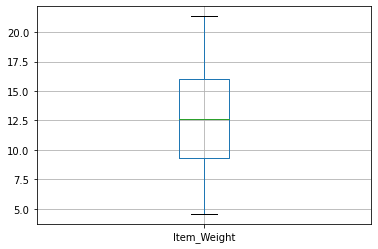

In [16]:
df.boxplot(column='Item_Weight')

<AxesSubplot:>

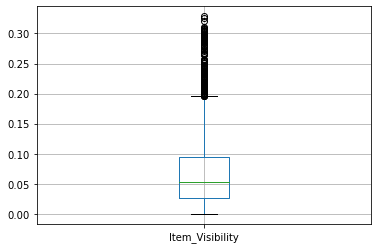

In [17]:
df.boxplot(column='Item_Visibility')

<AxesSubplot:>

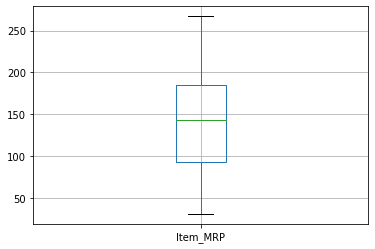

In [18]:
df.boxplot(column='Item_MRP')

<AxesSubplot:>

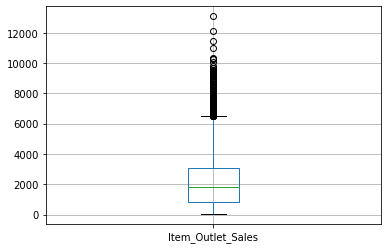

In [19]:
df.boxplot(column='Item_Outlet_Sales')

### Bivariate to detect relations between features

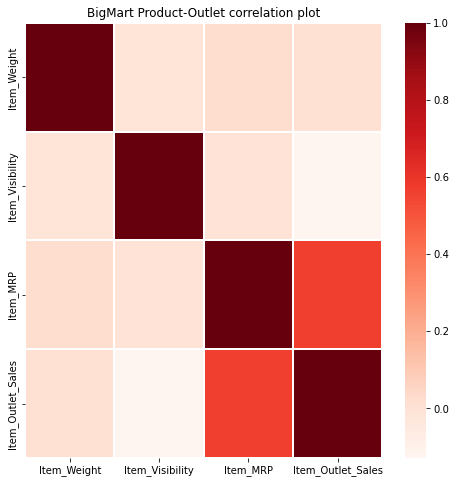

In [21]:
plt.figure(figsize = (8,8))
plt.title('BigMart Product-Outlet correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

#### We see strong positive correlation between Item_MRP and our target column Item_Outlet_Sales

##### Maximum Retail Price = Product's actual Cost + Profit Margin + CnF margin + Distributor Margin + Retailer Margin + GST + Transportation + other expenses,.. etc

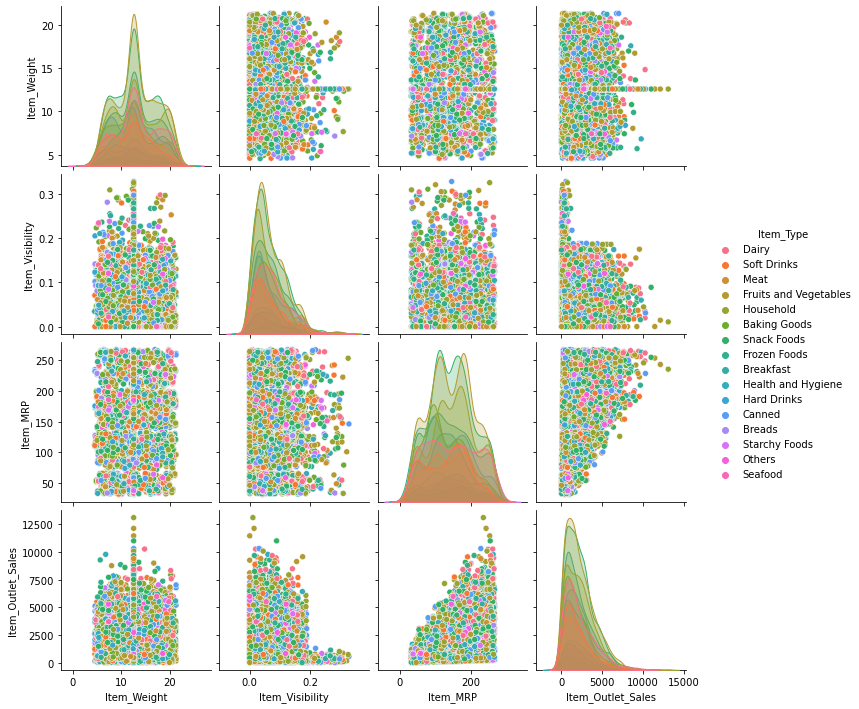

In [22]:
sns.pairplot(df, hue ='Item_Type')
plt.show()

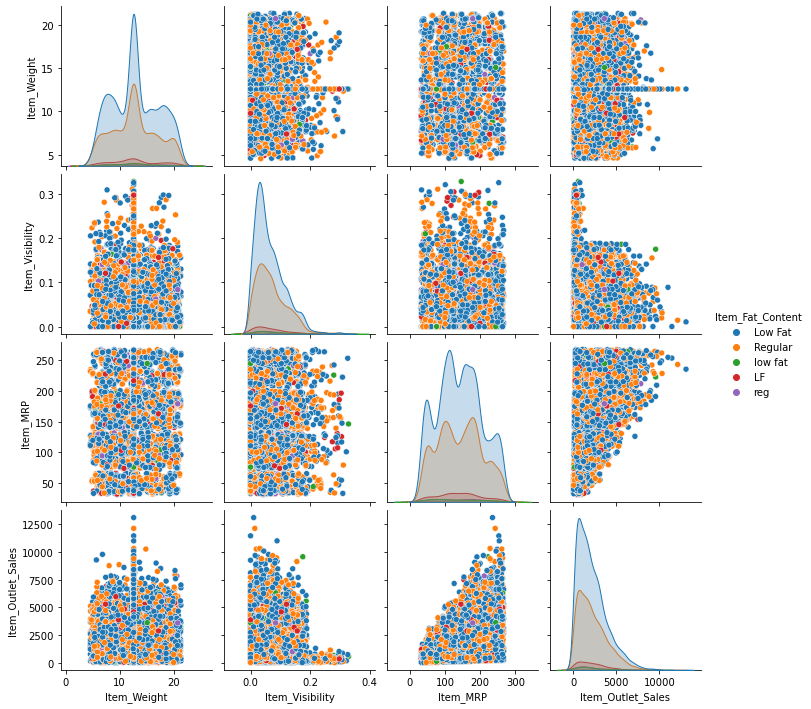

In [23]:
sns.pairplot(df, hue ='Item_Fat_Content')
plt.show()

### Feature Engineering & Label Encoding

In [24]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
df['Item_Fat_Content'].replace(to_replace=['low fat','LF'], value='Low Fat', inplace = True)
df['Item_Fat_Content'].replace(to_replace=['reg'], value='Regular', inplace = True)


In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [28]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [29]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [30]:
df['Outlet_Type'].value_counts() # One-Hot-Encoding?

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

#### Label Encoding

In [31]:
# Outlet_Type_Dumm = pd.get_dummies(data=df['Outlet_Type'], columns=['Outlet_Type'], drop_first=True)

# df = pd.concat([df, Outlet_Type_Dumm], axis=1)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Item_Fat_Content"] = ord_enc.fit_transform(df[["Item_Fat_Content"]])
df["Outlet_Size"] = ord_enc.fit_transform(df[["Outlet_Size"]])
df["Item_Type"] = ord_enc.fit_transform(df[["Item_Type"]])
df["Outlet_Location_Type"] = ord_enc.fit_transform(df[["Outlet_Location_Type"]])
df["Outlet_Type"] = ord_enc.fit_transform(df[["Outlet_Type"]])


df_test["Item_Fat_Content"] = ord_enc.fit_transform(df_test[["Item_Fat_Content"]])
df_test["Outlet_Size"] = ord_enc.fit_transform(df_test[["Outlet_Size"]])
df_test["Item_Type"] = ord_enc.fit_transform(df_test[["Item_Type"]])
df_test["Outlet_Location_Type"] = ord_enc.fit_transform(df_test[["Outlet_Location_Type"]])
df_test["Outlet_Type"] = ord_enc.fit_transform(df_test[["Outlet_Type"]])


df.head(11)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0.0,0.016047,4.0,249.8092,OUT049,1999-01-01,1.0,0.0,1.0,3735.1380
1,DRC01,5.920,1.0,0.019278,14.0,48.2692,OUT018,2009-01-01,1.0,2.0,2.0,443.4228
2,FDN15,17.500,0.0,0.016760,10.0,141.6180,OUT049,1999-01-01,1.0,0.0,1.0,2097.2700
3,FDX07,19.200,1.0,0.000000,6.0,182.0950,OUT010,1998-01-01,1.0,2.0,0.0,732.3800
4,NCD19,8.930,0.0,0.000000,9.0,53.8614,OUT013,1987-01-01,0.0,2.0,1.0,994.7052
5,FDP36,10.395,1.0,0.000000,0.0,51.4008,OUT018,2009-01-01,1.0,2.0,2.0,556.6088
6,FDO10,13.650,1.0,0.012741,13.0,57.6588,OUT013,1987-01-01,0.0,2.0,1.0,343.5528
7,FDP10,12.600,0.0,0.127470,13.0,107.7622,OUT027,1985-01-01,1.0,2.0,3.0,4022.7636
8,FDH17,16.200,1.0,0.016687,5.0,96.9726,OUT045,2002-01-01,1.0,1.0,1.0,1076.5986
9,FDU28,19.200,1.0,0.094450,5.0,187.8214,OUT017,2007-01-01,1.0,1.0,1.0,4710.5350


In [33]:
df.head(11)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0.0,0.016047,4.0,249.8092,OUT049,1999-01-01,1.0,0.0,1.0,3735.1380
1,DRC01,5.920,1.0,0.019278,14.0,48.2692,OUT018,2009-01-01,1.0,2.0,2.0,443.4228
2,FDN15,17.500,0.0,0.016760,10.0,141.6180,OUT049,1999-01-01,1.0,0.0,1.0,2097.2700
3,FDX07,19.200,1.0,0.000000,6.0,182.0950,OUT010,1998-01-01,1.0,2.0,0.0,732.3800
4,NCD19,8.930,0.0,0.000000,9.0,53.8614,OUT013,1987-01-01,0.0,2.0,1.0,994.7052
5,FDP36,10.395,1.0,0.000000,0.0,51.4008,OUT018,2009-01-01,1.0,2.0,2.0,556.6088
6,FDO10,13.650,1.0,0.012741,13.0,57.6588,OUT013,1987-01-01,0.0,2.0,1.0,343.5528
7,FDP10,12.600,0.0,0.127470,13.0,107.7622,OUT027,1985-01-01,1.0,2.0,3.0,4022.7636
8,FDH17,16.200,1.0,0.016687,5.0,96.9726,OUT045,2002-01-01,1.0,1.0,1.0,1076.5986
9,FDU28,19.200,1.0,0.094450,5.0,187.8214,OUT017,2007-01-01,1.0,1.0,1.0,4710.5350


### Preprocessing & Standard Scaler

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Identifier            8523 non-null   object        
 1   Item_Weight                8523 non-null   float64       
 2   Item_Fat_Content           8523 non-null   float64       
 3   Item_Visibility            8523 non-null   float64       
 4   Item_Type                  8523 non-null   float64       
 5   Item_MRP                   8523 non-null   float64       
 6   Outlet_Identifier          8523 non-null   object        
 7   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 8   Outlet_Size                8523 non-null   float64       
 9   Outlet_Location_Type       8523 non-null   float64       
 10  Outlet_Type                8523 non-null   float64       
 11  Item_Outlet_Sales          8523 non-null   float64       
dtypes: dat

In [35]:
df['Item_Weight'].value_counts()

12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64

In [36]:
#df['Item_Weight'] = df['Item_Weight'].astype(np.float16)

In [37]:
# Columns which need rescaling
rescale_col = ['Item_Weight','Item_Visibility','Item_MRP']

In [39]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
# we only aply the feature scaling on the features other than dummy variables.
df[rescale_col]=rs.fit_transform(df[rescale_col])
#df_test[rescale_col]=rs.fit_transform(df_test[rescale_col])

In [40]:
X_col = ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [41]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.493274,0.0,-0.560443,4.0,1.163142,OUT049,1999-01-01,1.0,0.0,1.0,3735.1380
1,DRC01,-0.998505,1.0,-0.512646,14.0,-1.031872,OUT018,2009-01-01,1.0,2.0,2.0,443.4228
2,FDN15,0.732436,0.0,-0.549899,10.0,-0.015191,OUT049,1999-01-01,1.0,0.0,1.0,2097.2700
3,FDX07,0.986547,1.0,-0.797844,6.0,0.425652,OUT010,1998-01-01,1.0,2.0,0.0,732.3800
4,NCD19,-0.548580,0.0,-0.797844,9.0,-0.970966,OUT013,1987-01-01,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,-0.857250,0.0,0.042199,13.0,0.778819,OUT013,1987-01-01,0.0,2.0,1.0,2778.3834
8519,FDS36,-0.630792,1.0,-0.102795,0.0,-0.379622,OUT045,2002-01-01,1.0,1.0,1.0,549.2850
8520,NCJ29,-0.298954,0.0,-0.277305,8.0,-0.630496,OUT035,2004-01-01,2.0,1.0,1.0,1193.1136
8521,FDN46,-0.805680,1.0,1.350523,13.0,-0.434337,OUT018,2009-01-01,1.0,2.0,2.0,1845.5976


### Modeling Pipleline

In [42]:
#### Linear Regression

In [43]:
X = df[X_col]
y = df['Item_Outlet_Sales']

In [44]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state= 1)

In [45]:
linreg = LinearRegression()

In [50]:
from sklearn.model_selection import cross_val_score

cross_val_score(linreg, X, y, cv = 5, scoring='neg_mean_absolute_error').mean().round(2)

-1184.85

In [47]:
linreg.fit(X,y)

LinearRegression()

In [52]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X)
IterativeImputer(random_state=0)

df_test[X_col] = np.round(imp.transform(df_test[X_col]))

In [53]:
linreg.predict(df_test[X_col])

array([3330.60985572, 2643.49156553, 1295.51586219, ..., 2503.11024001,
       2721.32130537, 2547.61065285])

In [ ]:
#### Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X, y)
regressor.predict(df_test[X_col])

array([3998.654982, 3893.605058,  345.78323 , ..., 3887.619516,
       3757.369062, 3757.369062])

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold

model = XGBRegressor()
model.fit(X, y)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
yhat = model.predict(df_test[X_col])

In [57]:
### TO-DO Regularized Linear Regression and Summary